In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)
pd.set_option('display.max_columns', None)

sns.set()

## Wczytanie danych

In [2]:
dirpath = './z3' # katalog zawierający wyłącznie pliki z rozszerzeniem .gz
df = pd.concat([pd.read_csv(os.path.join(dirpath, fname))
                for fname in os.listdir(dirpath)], ignore_index=True)

df['czas'] = df['czas'].str[:19]
df['czas'] = pd.to_datetime(df['czas'], format='%Y-%m-%d %H:%M:%S')

col_df = pd.read_excel('zadanie-3-sztuczny-analizator-temperatury-żużla-wewnątrz-pieca-zawiesionowego/opis_zmiennych.xlsx')
col_df['opis'] = col_df['opis'] + ' ' + col_df['Jednostka']
col_df.drop(columns=['Jednostka'], inplace=True)

names_dict = col_df.set_index('Tagname').to_dict()['opis']
names_dict =  {k.lower(): v for k, v in names_dict.items()}

df.rename(columns=names_dict, inplace=True)

temp = pd.read_csv('zadanie-3-sztuczny-analizator-temperatury-żużla-wewnątrz-pieca-zawiesionowego/temp_zuz.csv', delimiter=';')
temp.rename(columns={'Czas': 'czas'}, inplace=True)
temp['czas'] = pd.to_datetime(temp['czas'])

merged = temp.merge(df, how='inner', on='czas')
merged.dropna(axis=0, inplace=True)

## Wstępne zapoznanie się z danymi

In [3]:
merged.head()

,czas,temp_zuz,REG NADAWY KONCENTRATU LIW1 Mg/h,REG NADAWY KONCENTRATU LIW2 Mg/h,REG KONCENTRAT PRAZONY LIW3 Mg/h,REG PYL ZWROT LIW4 Mg/h,WODA CHŁODZĄCA DO KOLEKTOR KZ7 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ8 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ9 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ10 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ11 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ12 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ13 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ15 m3/h,SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA MW,WODA POWROTNA KOLEKTORA KZ7 °C,WODA POWROTNA KOLEKTORA KZ8 °C,WODA POWROTNA KOLEKTORA KZ9 °C,WODA POWROTNA KOLEKTORA KZ10 °C,WODA POWROTNA KOLEKTORA KZ11 °C,WODA POWROTNA KOLEKTORA KZ12 °C,WODA POWROTNA KOLEKTORA KZ13 °C,WODA POWROTNA KOLEKTORA KZ15 °C,TEMP.1 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.2 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.3 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.4 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.5 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.6 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.7 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.8 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.9 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.10 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.11 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.12 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.13 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.14 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.15 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.16 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.17 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.18 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.19 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.20 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.21 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP22 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.23 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.24 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP. NA KOL.. KAN.1-34 °C,TEMP. NA KOL.. KAN.35-68 °C,WENT. RF01 ODCZ_ZAD OBROTÓW %,WENT. RF02 ODCZ_ZAD OBROTÓW %,WENT. RF03 ODCZ_ZAD OBROTÓW %,TEMP. WODY ZASIL.OBIEG PZ 1 °C,TEMP. WODY ZASIL.OBIEG PZ 2 °C,Prażona mieszanina koncentratów HG1 - fe %,Prażona mieszanina koncentratów HG1 - sog %,prob_corg %,prob_fe %,prob_s %
0,2020-10-01 00:00:00,1297,56.729077,54.724422,11.966905,22.493207,108.702362,112.280388,110.013796,108.761583,110.604901,104.500427,143.091252,108.931620,14.362428,27.288373,27.312385,28.020799,28.711070,31.780698,31.501641,30.967030,27.109125,385.911908,421.166412,455.862854,435.741310,407.213048,408.372387,384.642979,372.502841,397.327430,418.621955,464.129368,407.493664,460.630989,450.100719,366.944229,398.995553,427.694153,427.062653,477.684730,410.008338,429.149540,466.196747,374.686929,407.642429,19.126427,19.929581,92.090454,92.024078,92.405281,24.665309,24.526161,4.48,8.98,8.60,4.55,9.87
1,2020-10-01 01:00:00,1295,55.309363,55.327746,11.544775,22.702118,108.378922,112.237887,109.862477,109.128895,110.520359,104.410075,142.985050,108.880230,14.978720,27.219282,27.221511,27.939144,28.636892,31.564486,31.488853,30.879029,27.052852,385.723342,421.083700,455.837219,435.631037,407.153932,408.271946,384.574068,372.474948,397.250642,418.537285,464.060478,407.383448,460.571922,449.972812,366.843836,398.918779,427.658776,427.032567,477.617759,409.896111,429.088587,466.153444,374.576709,407.563703,18.885216,19.536727,92.129309,92.033540,92.402722,24.585718,24.448561,4.48,8.98,8.60,4.55,9.87
2,2020-10-01 02:00:00,1303,54.703949,54.957514,11.053689,20.013150,109.861116,112.517942,110.237388,109.214988,110.434876,104.657074,143.259025,109.084089,15.199544,27.282744,27.317890,27.943592,28.596797,31.358514,31.595133,30.976565,27.099851,385.313782,420.981374,455.811595,435.528665,407.102708,408.195179,384.497255,372.409594,397.173830,418.460503,463.983696,407.281123,460.520729,449.890089,366.767099,398.841997,427.607628,426.955754,477.566566,409.768059,429.011850,466.102266,374.448795,407.461271,18.612499,19.254154,92.104858,92.056562,92.400504,24.564115,24.484372,4.48,8.98,8.60,4.55,9.87
3,2020-10-01 02:30:00,1302,55.000000,55.224717,10.980221,19.902115,109.585113,112.805842,110.151395,108.958777,110.694621,104.680675,143.224937,109.094149,14.815123,27.319849,27.345661,27.939822,28.612143,31.560650,31.388281,31.213222,27.136939,385.177688,420.938082,455.798808,435.472567,407.062380,40

In [4]:
merged.shape

(11387, 59)

In [5]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11387 entries, 0 to 11386
Data columns (total 59 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   czas                                            11387 non-null  datetime64[ns]
 1   temp_zuz                                        11387 non-null  int64         
 2   REG NADAWY KONCENTRATU LIW1 Mg/h                11387 non-null  float64       
 3   REG NADAWY KONCENTRATU LIW2 Mg/h                11387 non-null  float64       
 4   REG KONCENTRAT PRAZONY LIW3 Mg/h                11387 non-null  float64       
 5   REG PYL ZWROT LIW4 Mg/h                         11387 non-null  float64       
 6   WODA CHŁODZĄCA DO KOLEKTOR KZ7 m3/h             11387 non-null  float64       
 7   WODA CHŁODZĄCA DO KOLEKTOR KZ8 m3/h             11387 non-null  float64       
 8   WODA CHŁODZĄCA DO KOLEKTOR KZ9 m3/h           

In [6]:
merged.isnull().sum()

czas                                              0
temp_zuz                                          0
REG NADAWY KONCENTRATU LIW1 Mg/h                  0
REG NADAWY KONCENTRATU LIW2 Mg/h                  0
REG KONCENTRAT PRAZONY LIW3 Mg/h                  0
REG PYL ZWROT LIW4 Mg/h                           0
WODA CHŁODZĄCA DO KOLEKTOR KZ7 m3/h               0
WODA CHŁODZĄCA DO KOLEKTOR KZ8 m3/h               0
WODA CHŁODZĄCA DO KOLEKTOR KZ9 m3/h               0
WODA CHŁODZĄCA DO KOLEKTOR KZ10 m3/h              0
WODA CHŁODZĄCA DO KOLEKTOR KZ11 m3/h              0
WODA CHŁODZĄCA DO KOLEKTOR KZ12 m3/h              0
WODA CHŁODZĄCA DO KOLEKTOR KZ13 m3/h              0
WODA CHŁODZĄCA DO KOLEKTOR KZ15 m3/h              0
SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA MW    0
WODA POWROTNA KOLEKTORA KZ7 °C                    0
WODA POWROTNA KOLEKTORA KZ8 °C                    0
WODA POWROTNA KOLEKTORA KZ9 °C                    0
WODA POWROTNA KOLEKTORA KZ10 °C                   0
WODA POWROTN

In [7]:
merged.describe()

,temp_zuz,REG NADAWY KONCENTRATU LIW1 Mg/h,REG NADAWY KONCENTRATU LIW2 Mg/h,REG KONCENTRAT PRAZONY LIW3 Mg/h,REG PYL ZWROT LIW4 Mg/h,WODA CHŁODZĄCA DO KOLEKTOR KZ7 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ8 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ9 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ10 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ11 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ12 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ13 m3/h,WODA CHŁODZĄCA DO KOLEKTOR KZ15 m3/h,SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA MW,WODA POWROTNA KOLEKTORA KZ7 °C,WODA POWROTNA KOLEKTORA KZ8 °C,WODA POWROTNA KOLEKTORA KZ9 °C,WODA POWROTNA KOLEKTORA KZ10 °C,WODA POWROTNA KOLEKTORA KZ11 °C,WODA POWROTNA KOLEKTORA KZ12 °C,WODA POWROTNA KOLEKTORA KZ13 °C,WODA POWROTNA KOLEKTORA KZ15 °C,TEMP.1 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.2 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.3 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.4 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.5 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.6 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.7 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.8 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.9 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.10 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.11 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.12 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.13 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.14 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.15 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.16 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.17 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.18 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.19 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.20 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.21 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP22 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.23 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP.24 POD 2 WARSTWĄ WYMURÓWKI °C,TEMP. NA KOL.. KAN.1-34 °C,TEMP. NA KOL.. KAN.35-68 °C,WENT. RF01 ODCZ_ZAD OBROTÓW %,WENT. RF02 ODCZ_ZAD OBROTÓW %,WENT. RF03 ODCZ_ZAD OBROTÓW %,TEMP. WODY ZASIL.OBIEG PZ 1 °C,TEMP. WODY ZASIL.OBIEG PZ 2 °C,Prażona mieszanina koncentratów HG1 - fe %,Prażona mieszanina koncentratów HG1 - sog %,prob_corg %,prob_fe %,prob_s %
count,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000,11387.000000
mean,1303.387284,54.958760,55.440662,7.869478,25.155401,106.257171,108.747365,109.451853,108.826147,108.546134,107.733844,141.335186,108.158528,19.925753,26.680580,26.540322,27.094281,28.282460,31.638816,31.430671,30.036720,26.848845,383.472901,410.780942,450.967337,434.037091,403.467486,404.336979,370.994709,374.682295,398.692920,421.092347,454.884700,407.629675,462.139974,454.338868,408.936079,415.767584,420.867181,425.002941,465.907918,416.470076,426.491124,467.839008,377.235274,398.739490,15.304985,15.618247,94.500279,94.548946,94.873110,24.636456,24.512944,4.633765,9.514738,8.637280,5.185878,10.823814
std,7.532050,6.677539,7.029085,4.753022,4.133623,1.565567,4.678206,2.548016,3.158004,3.501930,5.281305,4.689318,3.765396,3.727171,0.836382,0.812739,0.879204,0.824573,1.056380,1.105825,1.220324,0.851821,7.214669,10.669864,7.217285,9.841841,6.617358,6.508480,7.160181,7.527207,7.415264,6.150632,7.587604,6.503832,5.738830,6.094118,16.616316,9.376438,9.008219,9.109282,7.882238,13.656445,8.773519,6.653980,7.230791,8.622367,8.123752,8.112960,7.580523,6.696540,6.944980,0.740585,0.742549,0.876107,2.656612,0.320304,0.518662,0.564388
min,1190.000000,0.000000,0.000000,0.000000,0.000000,101.101371,98.321880,102.142096,100.363916,100.504572,96.956119,126.308634,97.674827,4.586244,23.420930,23.406707,23.913188,24.928419,28.478721,27.659854,25.998054,

<AxesSubplot:xlabel='czas', ylabel='temp_zuz'>

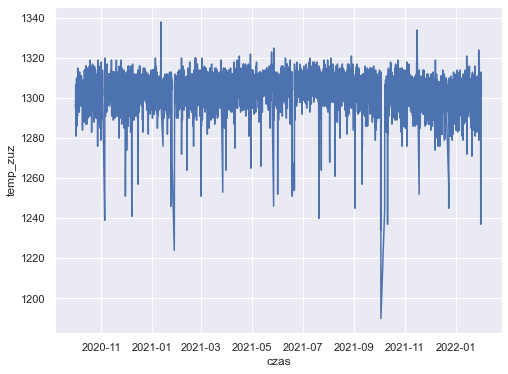

In [8]:
sns.lineplot(data=merged, x='czas', y='temp_zuz')

In [9]:
numerical_columns = df.select_dtypes('number').columns

## Rozkłady zmiennych

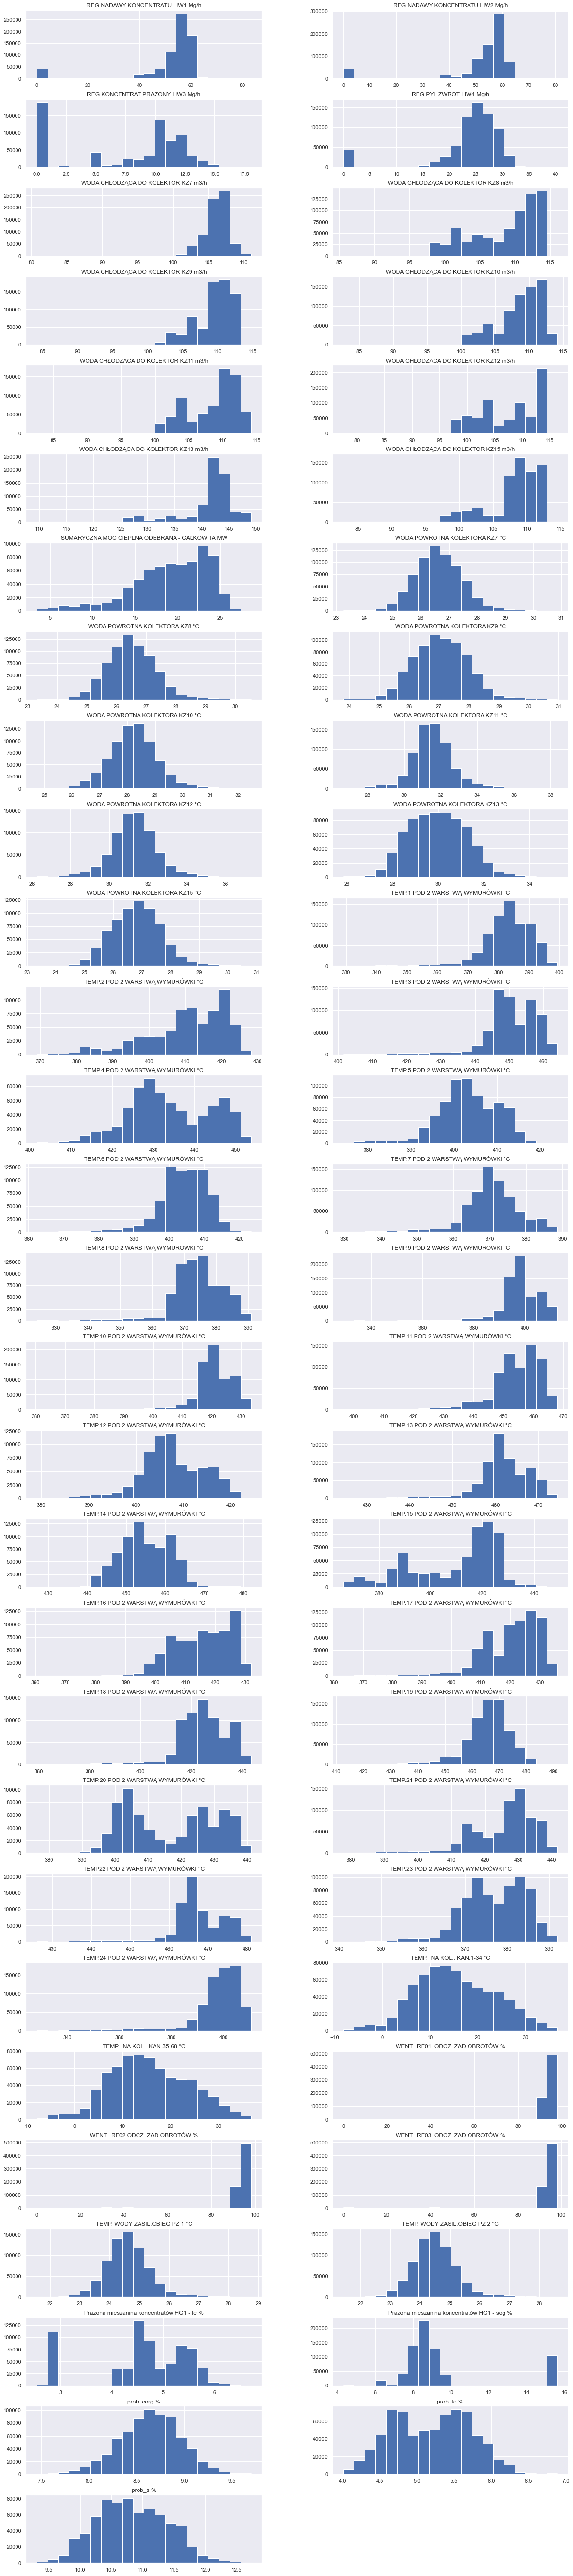

In [10]:
df[numerical_columns].hist(bins = 20, figsize = (20,100), layout=(30,2))
plt.show()

## Outliers

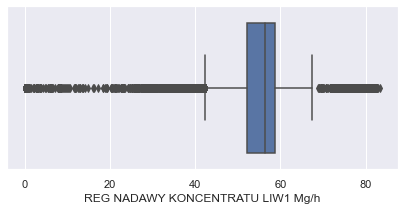

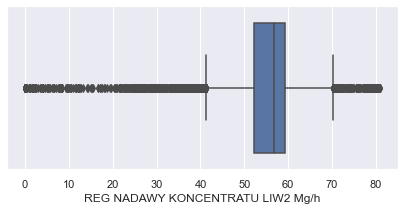

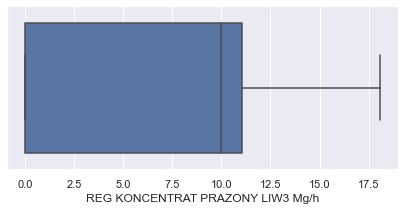

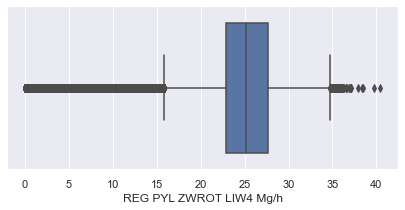

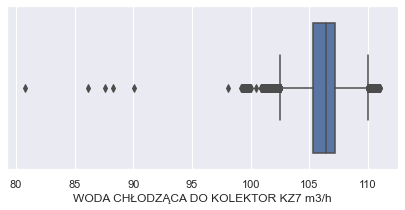

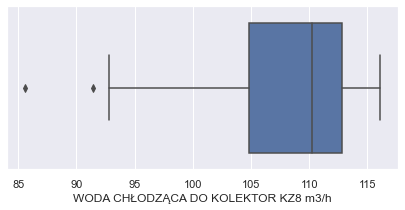

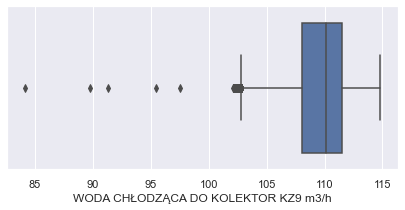

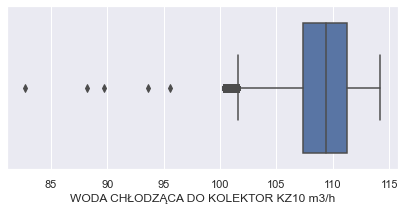

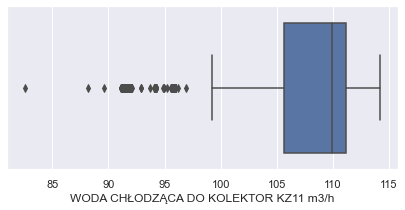

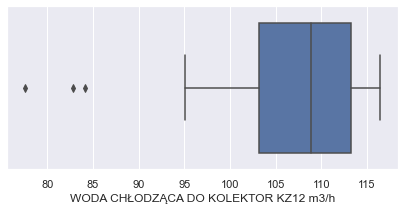

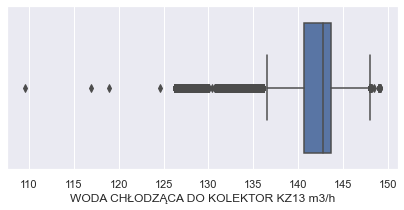

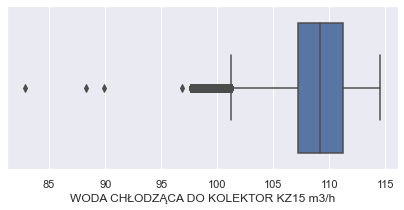

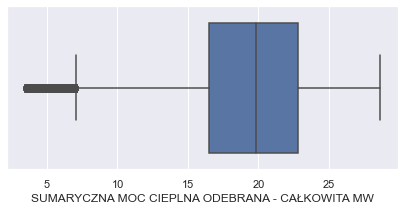

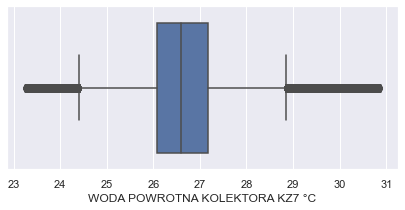

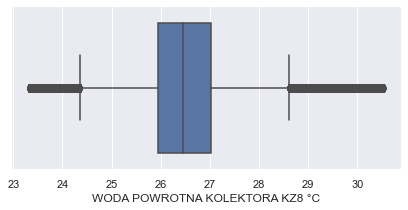

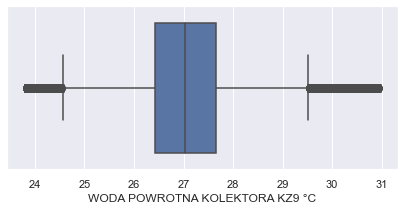

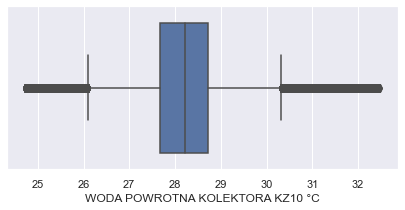

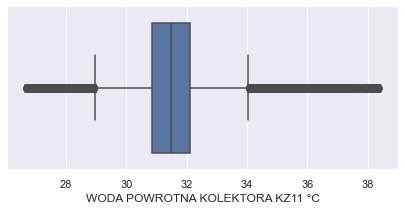

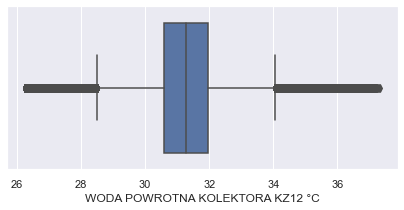

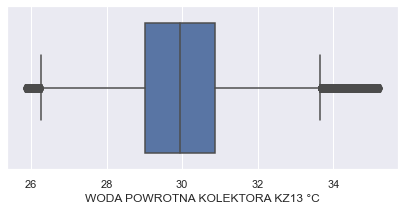

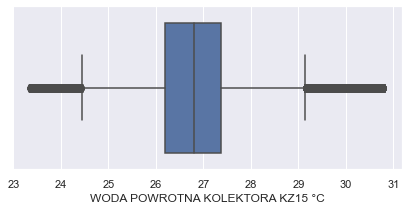

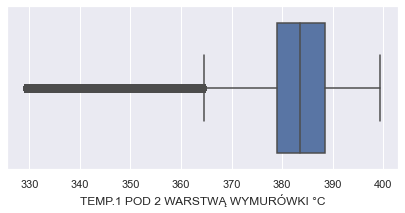

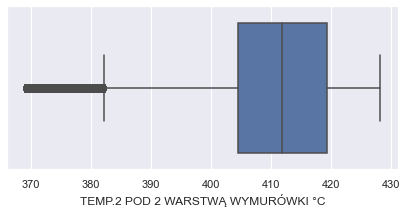

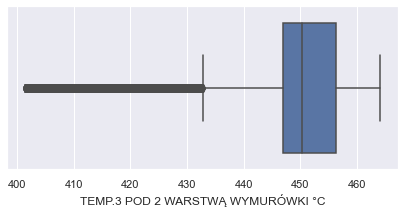

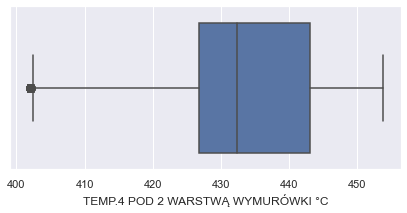

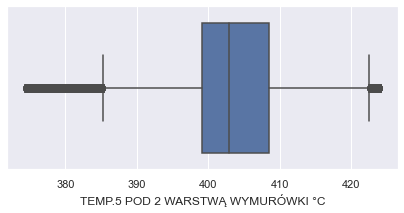

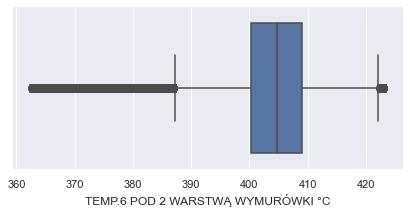

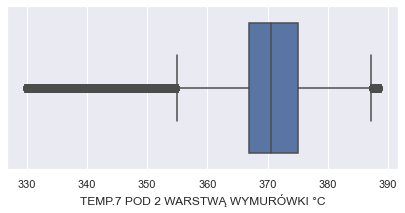

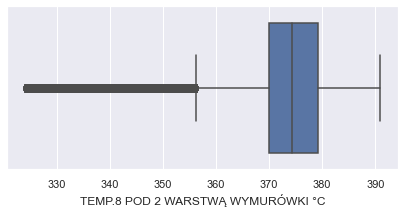

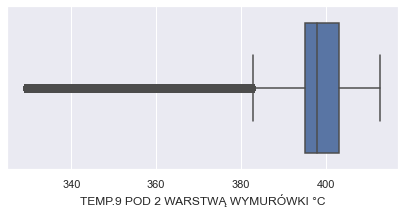

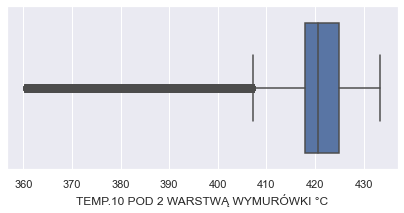

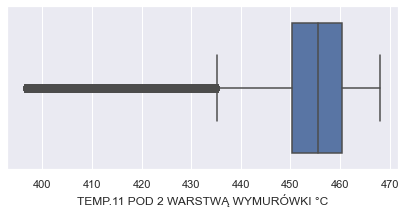

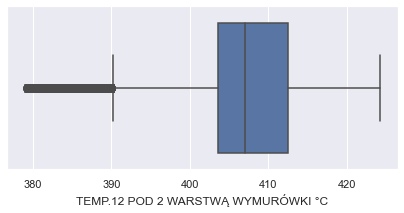

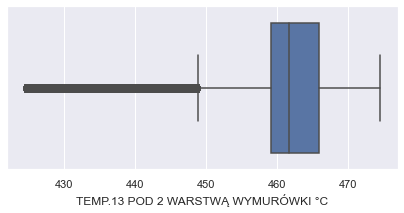

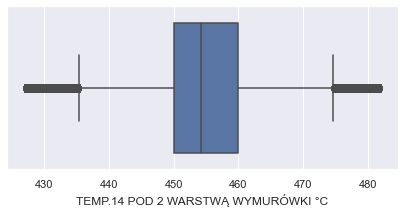

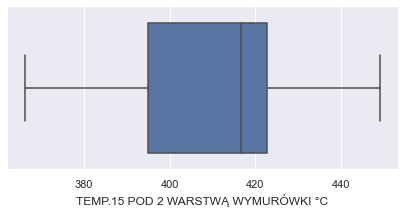

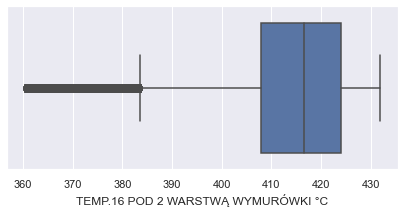

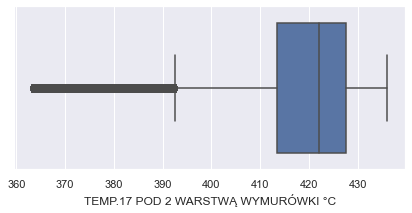

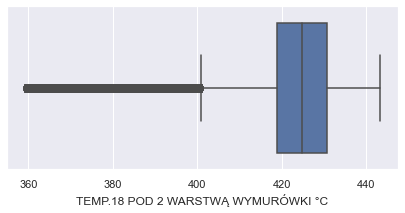

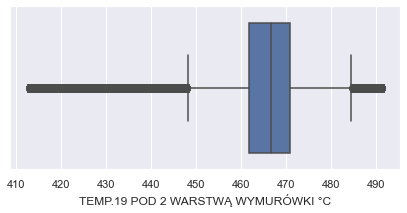

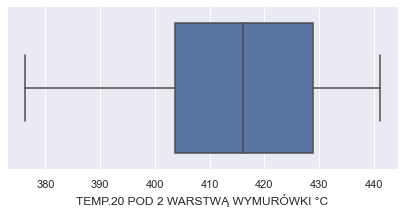

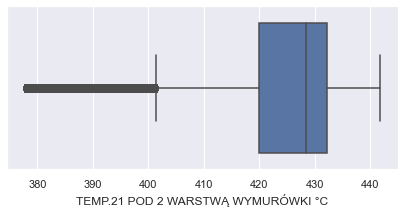

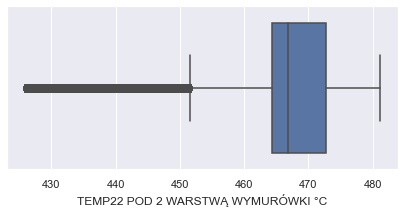

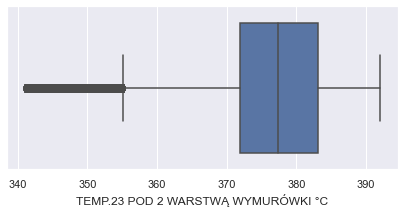

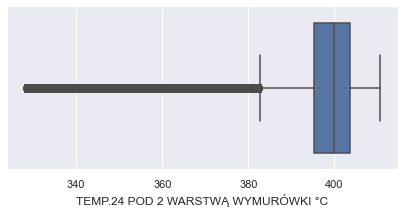

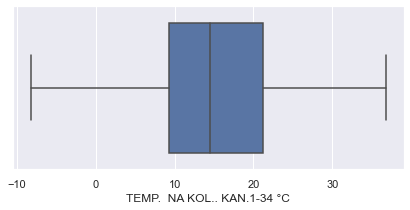

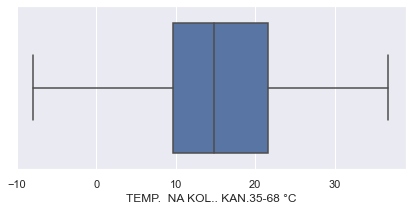

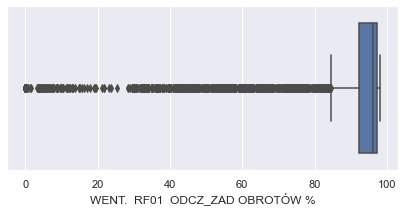

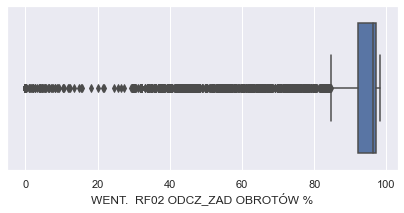

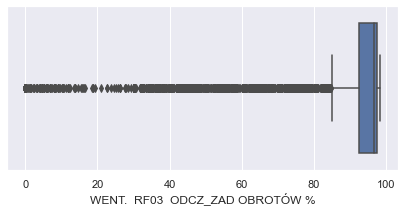

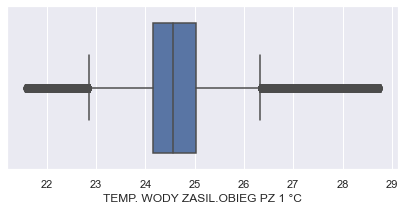

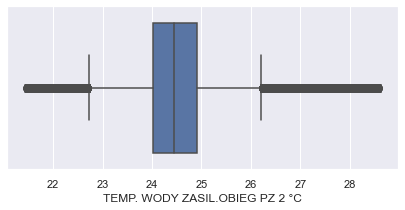

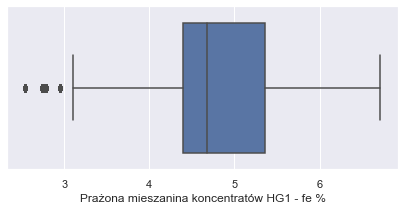

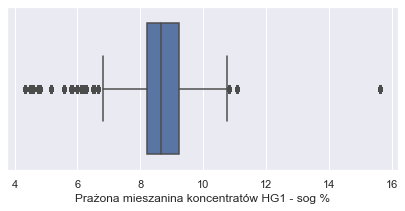

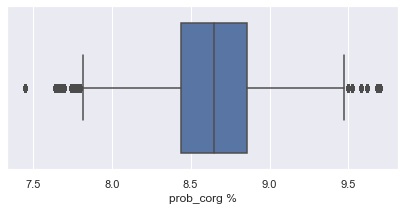

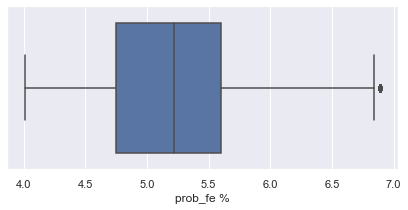

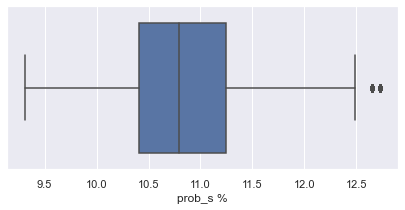

In [11]:
for col in numerical_columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(data=df, x = col)
    plt.show()

## Korelacja zmiennych

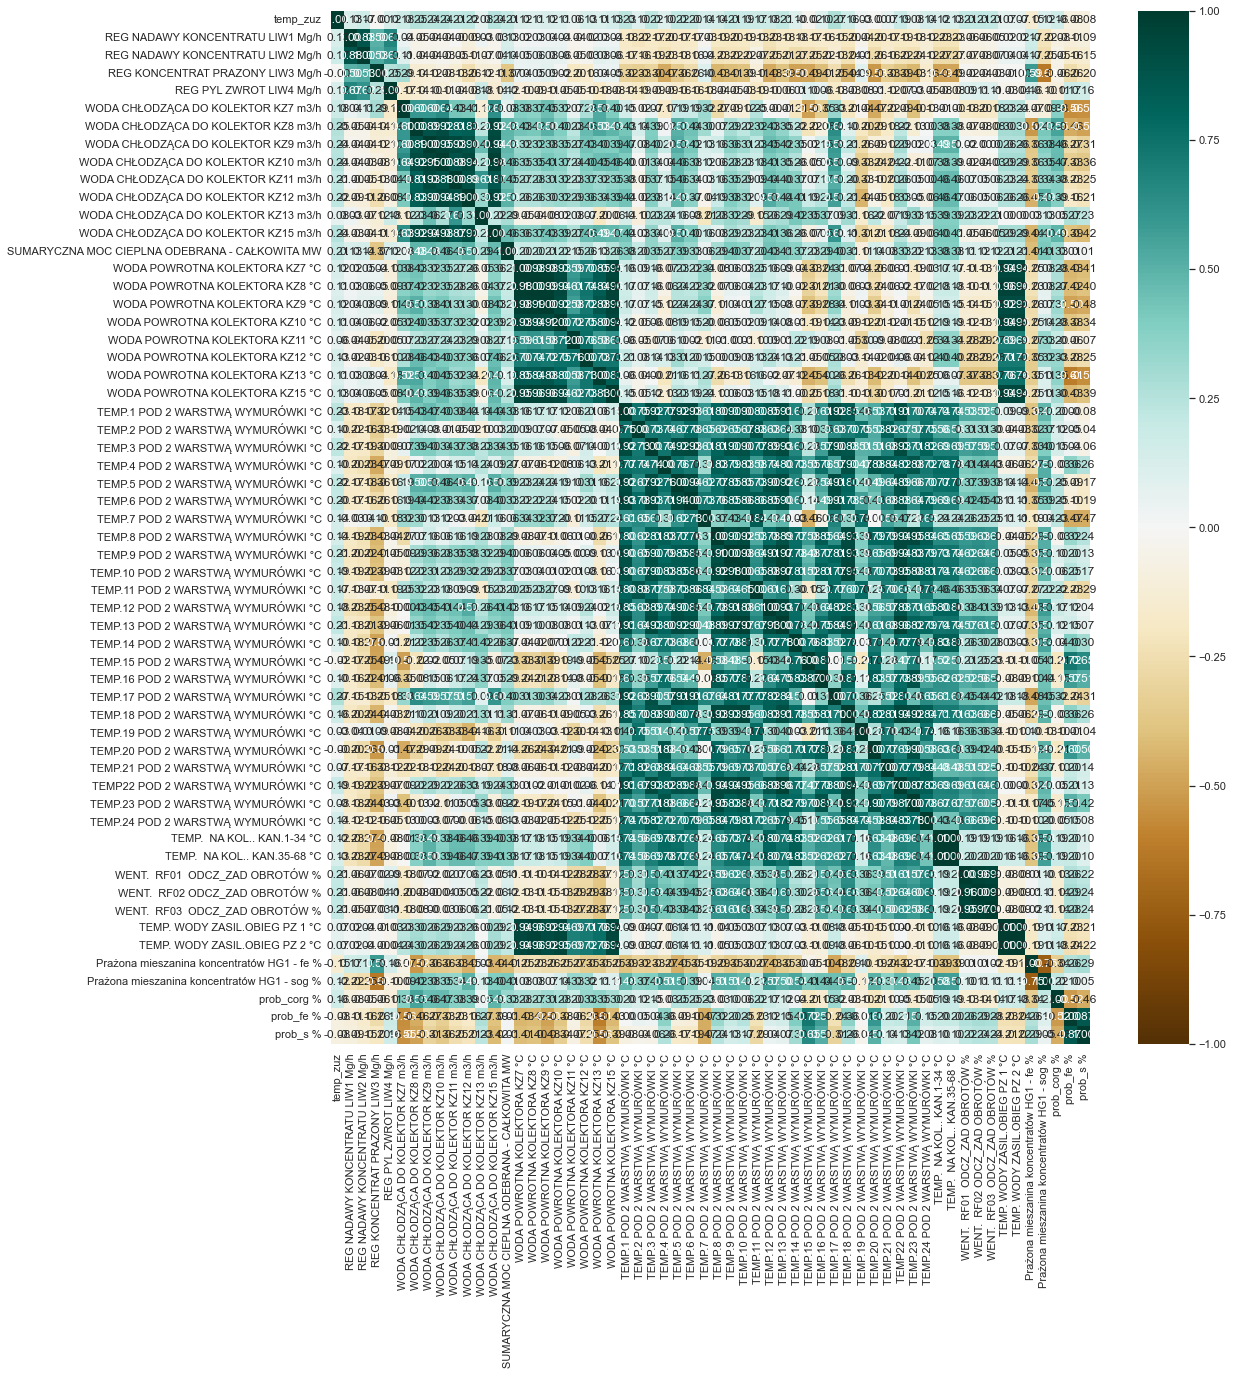

In [12]:
plt.figure(figsize=(17, 19))
heatmap = sns.heatmap(merged.corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt=".2f")
plt.show()

In [13]:
merged.corr()['temp_zuz'].abs().sort_values(ascending=False)

temp_zuz                                          1.000000
TEMP.17 POD 2 WARSTWĄ WYMURÓWKI °C                0.268146
WODA CHŁODZĄCA DO KOLEKTOR KZ8 m3/h               0.250472
WODA CHŁODZĄCA DO KOLEKTOR KZ10 m3/h              0.244585
WODA CHŁODZĄCA DO KOLEKTOR KZ15 m3/h              0.243915
WODA CHŁODZĄCA DO KOLEKTOR KZ9 m3/h               0.236319
TEMP.1 POD 2 WARSTWĄ WYMURÓWKI °C                 0.233588
WODA CHŁODZĄCA DO KOLEKTOR KZ12 m3/h              0.224424
TEMP.3 POD 2 WARSTWĄ WYMURÓWKI °C                 0.223286
TEMP.5 POD 2 WARSTWĄ WYMURÓWKI °C                 0.216706
WODA CHŁODZĄCA DO KOLEKTOR KZ11 m3/h              0.213783
WENT.  RF02 ODCZ_ZAD OBROTÓW %                    0.212573
TEMP.13 POD 2 WARSTWĄ WYMURÓWKI °C                0.212084
SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA MW    0.209926
WENT.  RF01  ODCZ_ZAD OBROTÓW %                   0.208342
TEMP.9 POD 2 WARSTWĄ WYMURÓWKI °C                 0.206499
WENT.  RF03  ODCZ_ZAD OBROTÓW %                   0.2056

## Zależności pomiędzy zmiennymi najbardziej skorelowanymi ze zmienną celu

In [20]:
def make_pair_grid_plot(data, columns, size=(10, 10)):
    grid = sns.PairGrid(data, vars=columns)
    grid = grid.map_upper(sns.kdeplot, fill=True, thresh=0.05)
    grid = grid.map_diag(sns.histplot)
    grid = grid.map_lower(sns.scatterplot, edgecolor='k')

    grid.fig.tight_layout()

    grid.fig.set_size_inches(size[0], size[1])

    plt.subplots_adjust(top=0.9)
    plt.show()

In [21]:
df_corr = merged.copy().drop(columns=['czas'])
cols_corr = df_corr.columns[df_corr.corr()['temp_zuz'].abs() > 0.22]

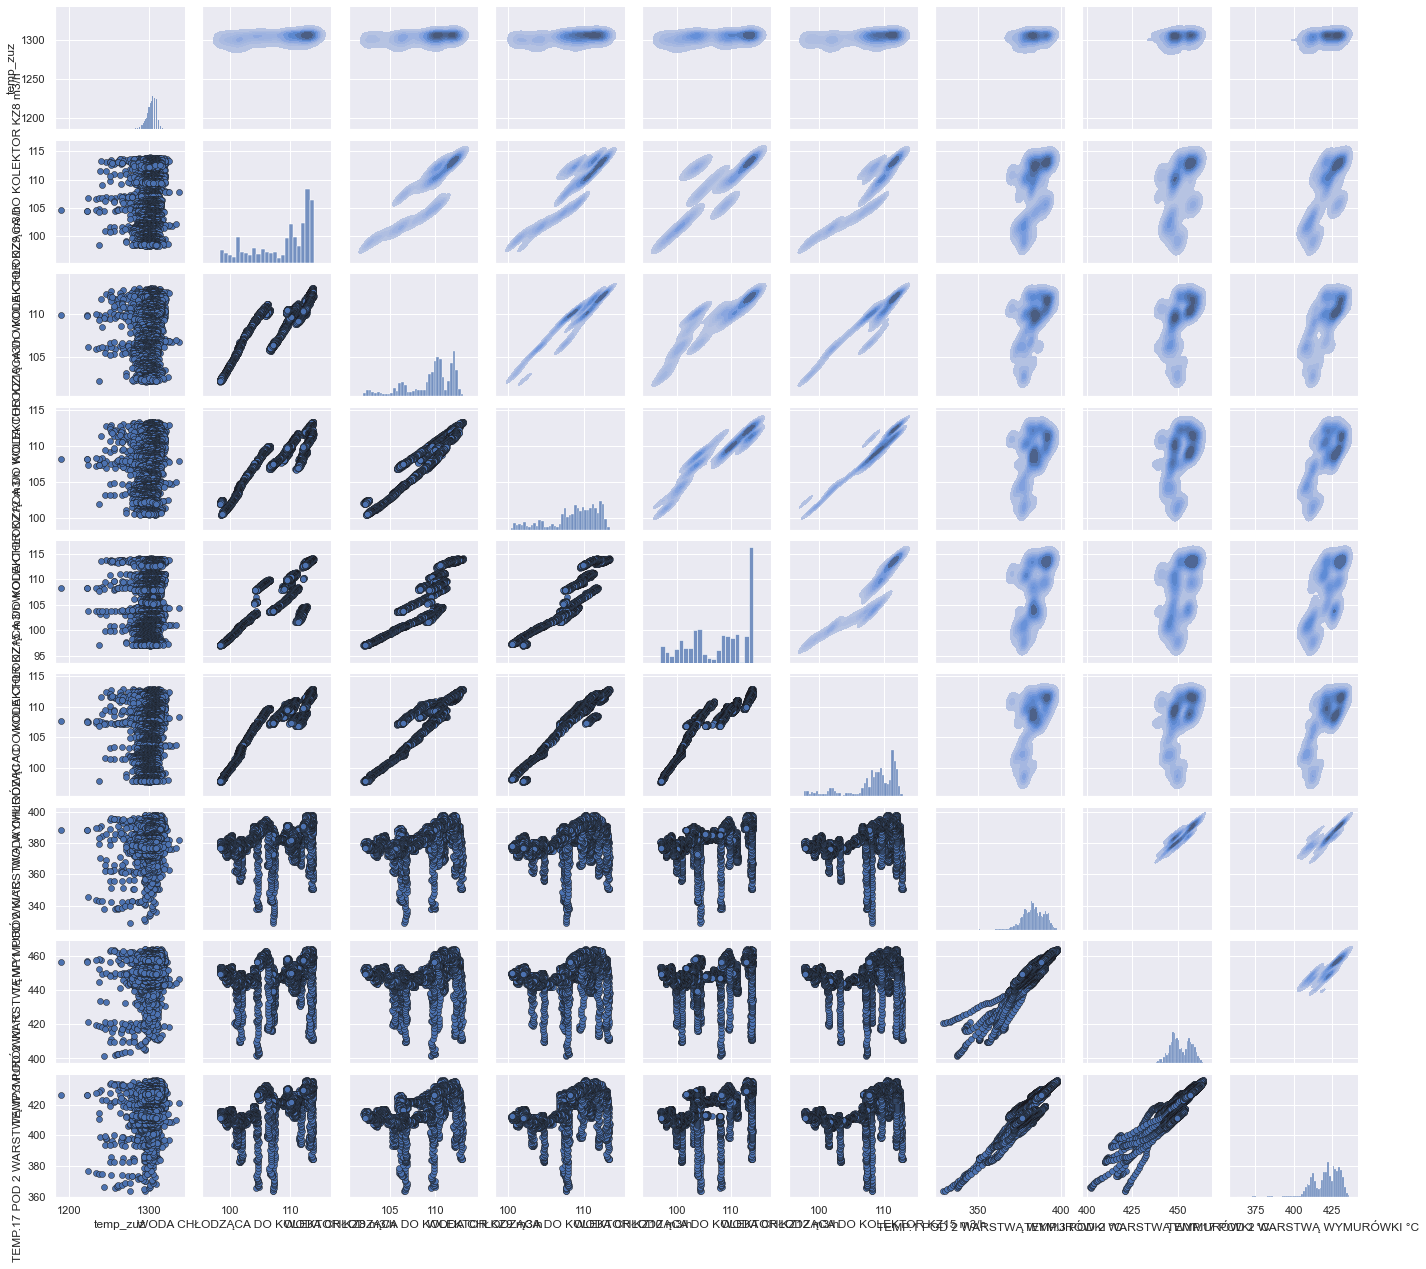

In [17]:
make_pair_grid_plot(data=df_corr, columns=cols_corr.to_list(), size=(19, 19))